# Linear regression (using SM and Sklearn)


# Import Packages 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns
sns.set()

# Using SM 

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv');

In [3]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


# Add Regression 

Determine the dependent and independent variables

In [4]:
y = data['GPA']
x1 = data['SAT']

Explore data 

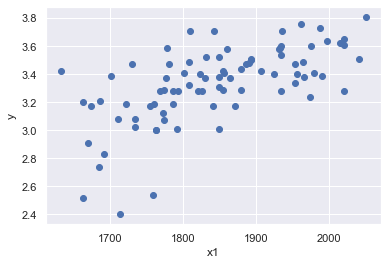

In [5]:
plt.scatter(x1,y)
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

Note: The higher GPA lead to Higher SAT 

Add regression ( Constant for the least minimum )

In [6]:
x = sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 27 Jul 2021   Prob (F-statistic):           7.20e-11
Time:                        16:08:35   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

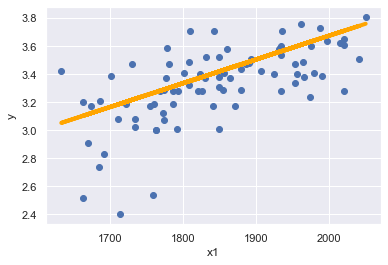

In [7]:
## After this I will see at the beginning that the SAT	0.0017 and const	0.2750	 so I'll buid the yhat

plt.scatter(x1,y)
yhat = 0.0017 * x1 + 0.2750
fig = plt.plot(x1,yhat, lw=4, c = 'orange' , label = 'Regression Line')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

# Using Sklearn

In [8]:
from sklearn.linear_model import LinearRegression

Import data 

In [9]:
data2 = pd.read_csv("1.01. Simple linear regression.csv")

In [10]:
x = data2['SAT']
y = data2['GPA']

In [11]:
x.shape

(84,)

In [12]:
y.shape

(84,)

Beacuse we're using the simple linear regression we want to reshape the x from one dimision to 2D , we use -1 , 1 beacuse it's a general way to reshape the dimisionality 

In [13]:
x_matrix = x.values.reshape(-1,1)

Take an instance from the linearregression 

In [14]:
reg = LinearRegression()

In [16]:
reg.fit(x_matrix,y)

LinearRegression()

R squared to know if the model fits our data

In [17]:
reg.score(x_matrix,y)

0.40600391479679765

Now we need to know the varaibles (Constatnt B0 - cofficent B1)
The coffiecent is B1
The constant is Intercept

In [18]:
reg.intercept_

0.2750402996602803

In [19]:
reg.coef_

array([0.00165569])

we use this to predict from our model 

In [31]:
new_data = pd.DataFrame(data=[1740,1480],columns=['SAT'])
new_data


,SAT
0,1740
1,1480


In [32]:
reg.predict(new_data)

array([3.15593751, 2.72545861])

In [33]:
new_data['Prediction'] = reg.predict(new_data)
new_data

,SAT,Prediction
0,1740,3.155938
1,1480,2.725459


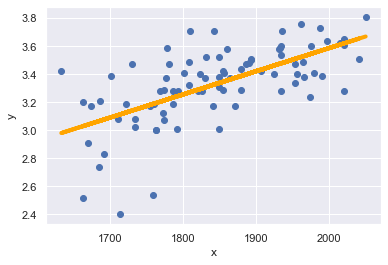

In [34]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat,lw=4,c='Orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()